In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
rows, cols = 28,28
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
input_shape = (rows, cols, 1)

In [7]:
# Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
# Onehot encoding
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [10]:
def build_lenet(input_shape):
    model = tf.keras.Sequential()
    # convolution1 Filteris 6, filter size is 5x5, tanh is activation function, 28x28 dimension
    model.add(tf.keras.layers.Conv2D(filters = 6,
                                    kernel_size = (5,5),
                                    strides = (1,1),
                                    activation = 'tanh',
                                    input_shape = input_shape))
    # subsampling1 input = 28x28x6. output = 14x14x6. Subsampling is simply average pooling so we use avg_pooling
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                              strides = (2,2)))
    # Convolution2 input = 14x14x6. Output = 10x10x16
    model.add(tf.keras.layers.Conv2D(filters = 16,
                                    kernel_size = (5,5),
                                    strides = (1,1),
                                    activation = 'tanh',
                                    ))
    # subsampling2 Input 28x28x6, output = 14x14x6, subsampling is simply average pooling so we use avg_pooling
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                              strides = (2,2)))
    model.add(tf.keras.layers.Flatten())
    # It is process of converting all resultant 2D arrays as single long continuos linear vector
    
    model.add(tf.keras.layers.Dense(units = 120, activation = 'tanh'))
    # Fully connected # 1. Input = 5x5x16, Output = 120
    
    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units = 84, activation = 'tanh'))
    
    # Output layer
    model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(lr = 0.1, momentum = 0.0, decay=0), metrics = ['accuracy'])
    return model

In [12]:
lenet = build_lenet(input_shape)
epochs = 10
history = lenet.fit(x_train, y_train,
                   epochs = epochs,
                   batch_size = 128,
                   verbose = 1)
loss, acc = lenet.evaluate(x_test, y_test)
print('Accuracy: ', acc)

# Transformation / reshape into pixel 28/28
x_train = x_train.reshape(x_train.shape[0],28,28)
print('Training data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0],28,28)
print('Training data', x_test.shape, y_test.shape)


Epoch 1/10


ValueError: in user code:

    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Abhi\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


1


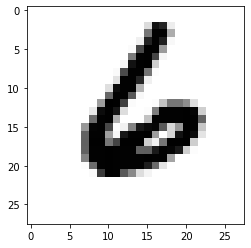

In [14]:
# To visualise a single image at the index 8888(6 is in the data set)
# image index = 8888
#plt.imshow(x_test[image_index].reshape(28,28), cmap = 'Greys')

# To predict the output using Lenet model built
# pred = lenet.predict(x_test[image_index].reshape(1,rows,cols,1))
# print(pred.argmax())

# example2 image index at 4444 (9 is number is dataset)
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap = 'Greys')

pred = lenet.predict(x_test[image_index].reshape(1,rows,cols,1))
print(pred.argmax())